In [1]:
from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/nepali_first_name_gender.csv')

In [3]:
filename = '../datasets/lastnames.txt'
with open(filename) as f:
    content = f.readlines()
content = [x.strip()[:-1] for x in content] 

In [4]:
last_names = [x.capitalize() for x in content] 

In [5]:
first_name_male = [x.capitalize() for x in list(df[df.gender=='M'].first_name)] 
first_name_female = [x.capitalize() for x in list(df[df.gender=='F'].first_name)]

In [6]:
[random.choice(first_name_male) + " " + random.choice(last_names) for x in range(10)]

['Ameesh Bohar',
 'Sushil Palanchoke',
 'Pashupati Rajopadhyay',
 'Sushil thapa Bhhatry',
 'Ayush Lamxal',
 'Srijan Gharti',
 'Amrit Parveen',
 'Shekhar Tripathee',
 'Udgam Kunear',
 'Saroj vatsa Sarraff']

In [7]:
total_customer = 200000
male_percent = 58

male = {'Name': [random.choice(first_name_male) + " " + random.choice(last_names) for x in range(int(total_customer*male_percent/100))]}
female = {'Name': [random.choice(first_name_female) + " " + random.choice(last_names) for x in range(int(total_customer*(100-male_percent)/100))]}

In [8]:
df_male = pd.DataFrame(data=male)
df_male['Gender'] = 'Male'
df_female = pd.DataFrame(data=female)
df_female['Gender'] = 'Female'

In [9]:
df = df_male.append(df_female)

In [10]:
df.loc[df.sample(frac=.04).index,
    'Gender'
] = 'Other'

df.loc[df.sample(frac=.02).index,
    'Gender'
] = 'Prefer not to say'

In [11]:
df.Gender.value_counts()

Male                 104434
Female                74320
Other                 13943
Prefer not to say      7303
Name: Gender, dtype: int64

In [12]:
def email_gen(name):
    name = name.lower()
    return (name.split(' ')[0]+'.'+name.split(' ')[1]+'@fakeemail.com')

In [13]:
df['Email'] = df.Name.apply(email_gen)

In [14]:
df

,Name,Gender,Email
0,Sushil thapa Lekhak,Male,sushil.thapa@fakeemail.com
1,Bibhas Zogi,Male,bibhas.zogi@fakeemail.com
2,Dipesh Gurun,Male,dipesh.gurun@fakeemail.com
3,Sewak Bantha,Male,sewak.bantha@fakeemail.com
4,Shekhar Maghaiya,Other,shekhar.maghaiya@fakeemail.com
...,...,...,...
83995,Sarita Tiwary,Female,sarita.tiwary@fakeemail.com
83996,Shambhav Arjyal,Female,shambhav.arjyal@fakeemail.com
83997,Amita Gubhaju,Female,amita.gubhaju@fakeemail.com
83998,Junu Shresetha,Female,junu.shresetha@fakeemail.com


In [15]:
df['Phone'] = [random.randint(9841000000, 9842000000) for x in range(df.shape[0])]

In [16]:
df

,Name,Gender,Email,Phone
0,Sushil thapa Lekhak,Male,sushil.thapa@fakeemail.com,9841425732
1,Bibhas Zogi,Male,bibhas.zogi@fakeemail.com,9841386944
2,Dipesh Gurun,Male,dipesh.gurun@fakeemail.com,9841921207
3,Sewak Bantha,Male,sewak.bantha@fakeemail.com,9841747884
4,Shekhar Maghaiya,Other,shekhar.maghaiya@fakeemail.com,9841892320
...,...,...,...,...
83995,Sarita Tiwary,Female,sarita.tiwary@fakeemail.com,9841467568
83996,Shambhav Arjyal,Female,shambhav.arjyal@fakeemail.com,9841868034
83997,Amita Gubhaju,Female,amita.gubhaju@fakeemail.com,9841524746
83998,Junu Shresetha,Female,junu.shresetha@fakeemail.com,9841535919


In [17]:
df['Channel'] = 'Word of Mouth'

In [18]:
df.loc[df.sample(frac=.5).index,
    'Channel'
] = 'Facebook/Ads'

df.loc[df.sample(frac=.2).index,
    'Channel'
] = 'Google Search'

df.loc[df.sample(frac=.1).index,
    'Channel'
] = 'Other'

In [19]:
df

,Name,Gender,Email,Phone,Channel
0,Sushil thapa Lekhak,Male,sushil.thapa@fakeemail.com,9841425732,Google Search
1,Bibhas Zogi,Male,bibhas.zogi@fakeemail.com,9841386944,Word of Mouth
2,Dipesh Gurun,Male,dipesh.gurun@fakeemail.com,9841921207,Google Search
3,Sewak Bantha,Male,sewak.bantha@fakeemail.com,9841747884,Google Search
4,Shekhar Maghaiya,Other,shekhar.maghaiya@fakeemail.com,9841892320,Google Search
...,...,...,...,...,...
83995,Sarita Tiwary,Female,sarita.tiwary@fakeemail.com,9841467568,Google Search
83996,Shambhav Arjyal,Female,shambhav.arjyal@fakeemail.com,9841868034,Other
83997,Amita Gubhaju,Female,amita.gubhaju@fakeemail.com,9841524746,Facebook/Ads
83998,Junu Shresetha,Female,junu.shresetha@fakeemail.com,9841535919,Other


In [20]:
df.Channel.value_counts()

Facebook/Ads     76863
Google Search    54891
Other            35050
Word of Mouth    33196
Name: Channel, dtype: int64

In [21]:
df['First Contact'] = 'app'

In [22]:
df.loc[df.sample(frac=.676).index,
    'First Contact'
] = 'browser'

In [23]:
df

,Name,Gender,Email,Phone,Channel,First Contact
0,Sushil thapa Lekhak,Male,sushil.thapa@fakeemail.com,9841425732,Google Search,browser
1,Bibhas Zogi,Male,bibhas.zogi@fakeemail.com,9841386944,Word of Mouth,browser
2,Dipesh Gurun,Male,dipesh.gurun@fakeemail.com,9841921207,Google Search,browser
3,Sewak Bantha,Male,sewak.bantha@fakeemail.com,9841747884,Google Search,browser
4,Shekhar Maghaiya,Other,shekhar.maghaiya@fakeemail.com,9841892320,Google Search,browser
...,...,...,...,...,...,...
83995,Sarita Tiwary,Female,sarita.tiwary@fakeemail.com,9841467568,Google Search,browser
83996,Shambhav Arjyal,Female,shambhav.arjyal@fakeemail.com,9841868034,Other,browser
83997,Amita Gubhaju,Female,amita.gubhaju@fakeemail.com,9841524746,Facebook/Ads,browser
83998,Junu Shresetha,Female,junu.shresetha@fakeemail.com,9841535919,Other,app


In [24]:
df['First Contact'].value_counts()

browser    172312
app         27688
Name: First Contact, dtype: int64

In [25]:
df = df.sample(frac=1)

In [26]:
df

,Name,Gender,Email,Phone,Channel,First Contact
28626,Shambhav Pokhael,Female,shambhav.pokhael@fakeemail.com,9841966267,Facebook/Ads,browser
75127,Chhiring Bagadaiya,Male,chhiring.bagadaiya@fakeemail.com,9841597391,Facebook/Ads,browser
68659,Sarita Silwal,Female,sarita.silwal@fakeemail.com,9841909510,Word of Mouth,browser
50483,Swaraj Keyal,Male,swaraj.keyal@fakeemail.com,9841061500,Facebook/Ads,browser
10791,Bibhas Budhathkoi,Male,bibhas.budhathkoi@fakeemail.com,9841518514,Other,browser
...,...,...,...,...,...,...
59692,Rasila Barali,Female,rasila.barali@fakeemail.com,9841105267,Google Search,browser
92944,Prasad Banjankar,Prefer not to say,prasad.banjankar@fakeemail.com,9841838368,Google Search,browser
1156,Prati Sauden,Female,prati.sauden@fakeemail.com,9841448427,Google Search,browser
43997,Vivi Darshandhari,Female,vivi.darshandhari@fakeemail.com,9841655158,Word of Mouth,browser


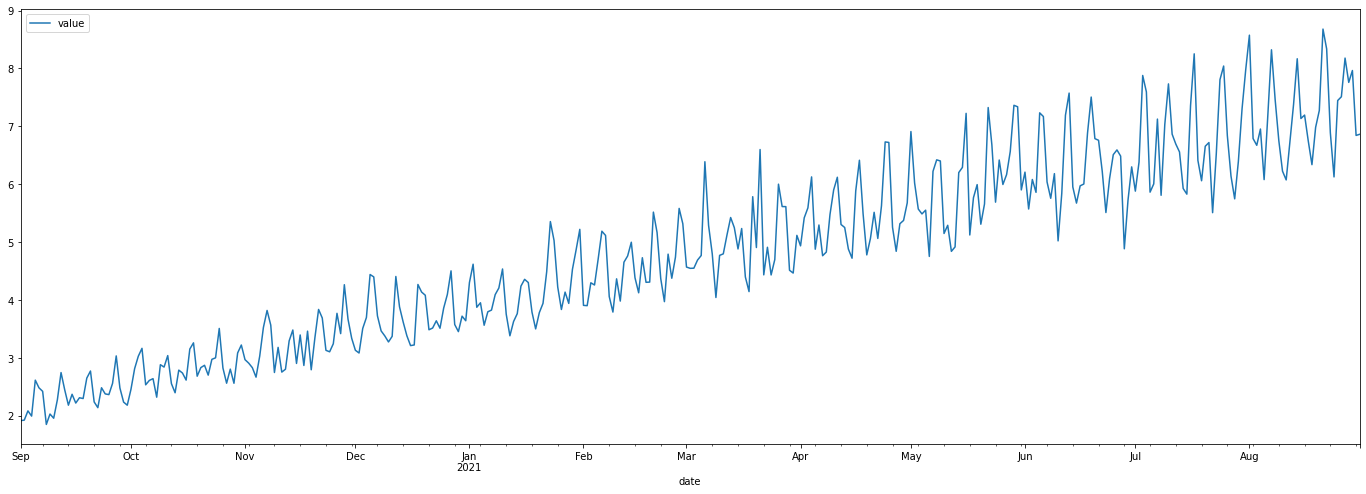

In [27]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor
import pandas as pd

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=5.0, offset=1., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.1, 5: 1.2, 6: 1.2}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

# weekday_factor.plot(start_date=start, end_date=end)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [28]:
data = g.generate()

In [29]:
data['rows'] = (100*data.value).astype(int)

In [30]:
data.rows.sum()

174418

In [31]:
data

,date,base_amount,my_linear_trend,white_noise,weekend_boost_factor,total_factor,value,rows
0,2020-09-01,1.0,2.000000,1.154145,1.0,2.308291,2.308291,230
1,2020-09-02,1.0,2.013699,0.924287,1.0,1.861235,1.861235,186
2,2020-09-03,1.0,2.027397,1.142201,1.0,2.315696,2.315696,231
3,2020-09-04,1.0,2.041096,0.881149,1.1,1.978360,1.978360,197
4,2020-09-05,1.0,2.054795,1.029406,1.2,2.538261,2.538261,253
...,...,...,...,...,...,...,...,...
360,2021-08-27,1.0,6.931507,0.972369,1.1,7.413982,7.413982,741
361,2021-08-28,1.0,6.945205,0.957009,1.2,7.975948,7.975948,797
362,2021-08-29,1.0,6.958904,1.050358,1.2,8.771210,8.771210,877
363,2021-08-30,1.0,6.972603,0.879281,1.0,6.130876,6.130876,613


In [44]:
# ["2020-09-01"]*100 + ["2020-09-02"] * 200
from datetime import datetime as dt
import datetime

def create_list(row):
    return [str(row.date)]*row.rows

In [33]:
final_dates = (data.apply(create_list, axis=1).sum())

In [34]:
clients = df.head(len(final_dates))
clients.reset_index(inplace = True, drop=True)

In [35]:
clients['Created At'] = final_dates

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_87942/3226454060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['Created At'] = final_dates


In [36]:
clients

,Name,Gender,Email,Phone,Channel,First Contact,Created At
0,Shambhav Pokhael,Female,shambhav.pokhael@fakeemail.com,9841966267,Facebook/Ads,browser,2020-09-01 00:00:00
1,Chhiring Bagadaiya,Male,chhiring.bagadaiya@fakeemail.com,9841597391,Facebook/Ads,browser,2020-09-01 00:00:00
2,Sarita Silwal,Female,sarita.silwal@fakeemail.com,9841909510,Word of Mouth,browser,2020-09-01 00:00:00
3,Swaraj Keyal,Male,swaraj.keyal@fakeemail.com,9841061500,Facebook/Ads,browser,2020-09-01 00:00:00
4,Bibhas Budhathkoi,Male,bibhas.budhathkoi@fakeemail.com,9841518514,Other,browser,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
174413,Kusum Nandi,Prefer not to say,kusum.nandi@fakeemail.com,9841749668,Other,browser,2021-08-31 00:00:00
174414,Samita Tenzing,Female,samita.tenzing@fakeemail.com,9841558888,Facebook/Ads,browser,2021-08-31 00:00:00
174415,Amesh Chitlangia,Male,amesh.chitlangia@fakeemail.com,9841215025,Facebook/Ads,browser,2021-08-31 00:00:00
174416,Prazol Seti,Male,prazol.seti@fakeemail.com,9841760149,Word of Mouth,browser,2021-08-31 00:00:00


In [37]:
clients.Gender.value_counts()

Male                 91129
Female               64808
Other                12167
Prefer not to say     6314
Name: Gender, dtype: int64

In [38]:
clients.Channel.value_counts()

Facebook/Ads     66991
Google Search    47867
Other            30653
Word of Mouth    28907
Name: Channel, dtype: int64

In [39]:
clients['First Contact'].value_counts()

browser    150295
app         24123
Name: First Contact, dtype: int64

In [57]:
def random_times(input_time):
    random_hour = random.uniform(0, 23)
    return dt.strptime(input_time, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=random_hour)

In [59]:
clients['Created At'] = clients['Created At'].apply(random_times)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_87942/2194111193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['Created At'] = clients['Created At'].apply(random_times)


In [61]:
clients['Client ID'] = clients.index + 100000000

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_87942/736601839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['Client ID'] = clients.index + 100000000


In [64]:
list(clients)

['Name',
 'Gender',
 'Email',
 'Phone',
 'Channel',
 'First Contact',
 'Created At',
 'Client ID']

In [67]:
clients[['Client ID',
 'Name',
 'Gender',
 'Email',
 'Phone',
 'Channel',
 'First Contact',
 'Created At']
].to_csv('clients.csv', index=False)